In [50]:
import numpy as np
import pandas as pd

### Light Curve Data ###
Author: Mimmo (Domenico Nardiello)

**Headers explanation:**

- col 1: TIME[d]: BTJD (BJD-2457000.0)
- col 2: TIMECORR[d]: Barycentric correction already applied to the col 1, anyway in this case is zero
- col 3: PSF_FLUX_RAW[e-/s] PSF-fitting RAW photometry flux
- col 4: PSF_FLUX_COR[e-/s] col 3, CORRECTED for CBV
- col 5: AP1_FLUX_RAW[e-/s] 1-px aperture photometry RAW flux
- col 6: AP1_FLUX_COR[e-/s] 1-px aperture photometry CORRECTED flux
- ... so on for col 7-12 for 2-px, 3-px, 4-px aperture photometry
- col 13: SKY_LOCAL[e-/s] Local sky background
- col 14, 15: X_POSITION[pixel] / Y_POSITION[pixel] The X/Y positions on the CCD
- col 16: DQUALITY flag. Ggood points have DQUALITY==0

**Light-curve cleaning:**

- Exclude DQUALITY>0.
- Background cut/include: 
    - include only the points with sky < mean_sky+4sigma
    - and all the points with sky>200 or 250 e/s (Depends on how faint is the star... maybe in this case it's better 200 as threshold)

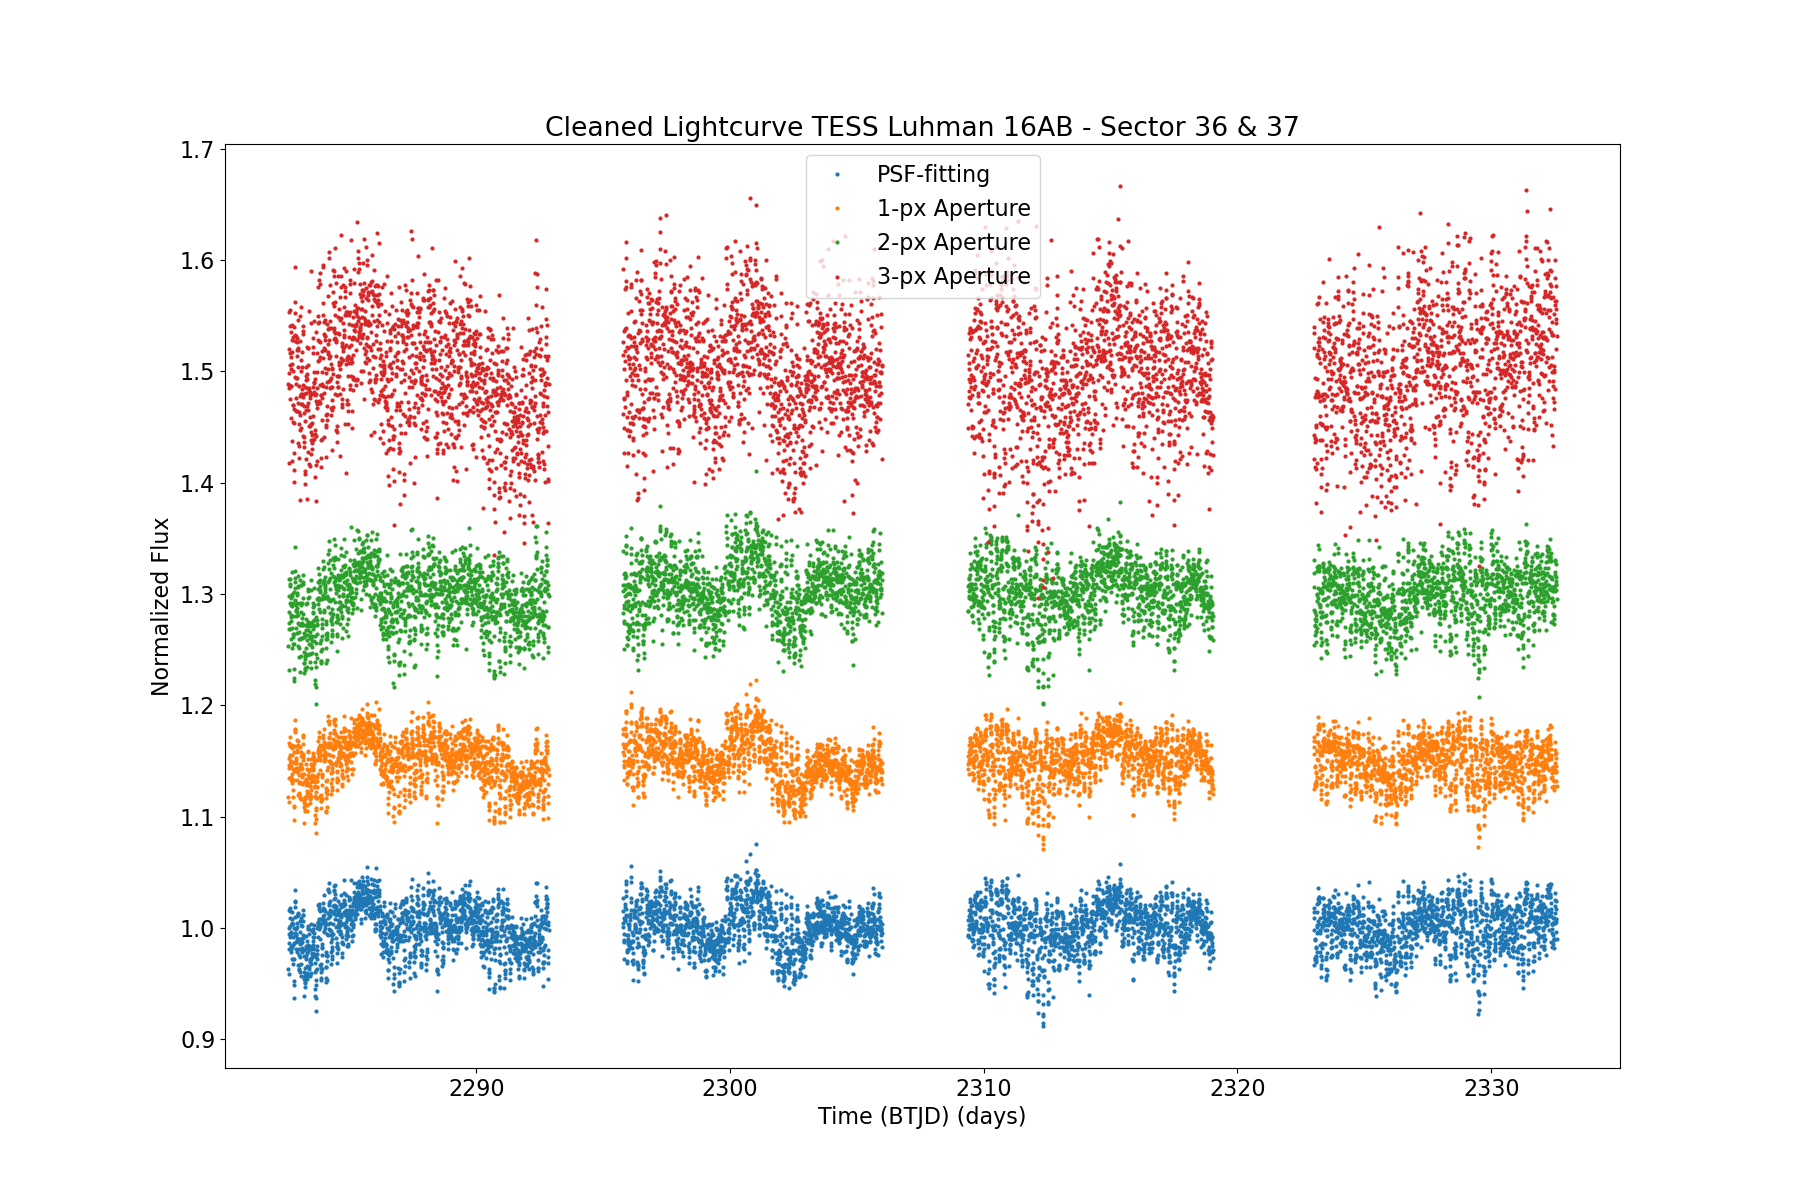

In [177]:
### SECTOR 36 Light Curve
lc36_path = "~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/raw/luhman16_extended_mission/hlsp_pathos_tess_lightcurve_tic-0936441397-s036_tess_v1_llc.txt"

### SECTOR 37 Light Curve
lc37_path = "~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/raw/luhman16_extended_mission/hlsp_pathos_tess_lightcurve_tic-0936441397-s037_tess_v1_llc.txt"

headerstring = "TIME TIMECORR PSF_FLUX_RAW PSF_FLUX_COR AP1_FLUX_RAW AP1_FLUX_COR AP2_FLUX_RAW AP2_FLUX_COR AP3_FLUX_RAW AP3_FLUX_COR AP4_FLUX_RAW AP4_FLUX_COR SKY_LOCAL X_POSITION Y_POSITION DQUALITY"
headers = headerstring.split()

lc36_data_raw = pd.read_csv(lc36_path, names=headers, skiprows=26, sep='\s+')
lc37_data_raw = pd.read_csv(lc37_path, names=headers, skiprows=26, sep='\s+')


### Light curve cleaning: OLD METHOD (WRONG)
sky36_threshold = lc36_data_raw.SKY_LOCAL.mean() + 4*lc36_data_raw.SKY_LOCAL.std()
sky36_noise = 250 #(e s^-1)
lc37_data = lc37_data_raw.query("DQUALITY == 0 & PSF_FLUX_COR>%f & PSF_FLUX_COR<=%f"%(sky36_noise, sky36_threshold))
lc36_data = lc36_data_raw.query("DQUALITY == 0 & PSF_FLUX_COR>%f & PSF_FLUX_COR<=%f"%(sky36_noise, sky36_threshold))

### Light curve cleaning: CORRECT METHOD
skyLOCALnoise = 150 #(e s^-1)

lc36_data = lc36_data_raw.query("DQUALITY == 0 & SKY_LOCAL<=%f"%(skyLOCALnoise))
sky36_threshold = lc36_data.SKY_LOCAL.mean() + 4*lc36_data.SKY_LOCAL.std()
lc36_data = lc36_data.query("SKY_LOCAL<=%f"%(sky36_threshold))

lc37_data = lc37_data_raw.query("DQUALITY == 0 & SKY_LOCAL<=%f"%(skyLOCALnoise))
sky37_threshold = lc37_data.SKY_LOCAL.mean() + 4*lc37_data.SKY_LOCAL.std()
lc37_data = lc37_data.query("SKY_LOCAL<=%f"%(sky37_threshold))

%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16}) 

### PSF-Flux Plots, COMPARISON WITH OTHER APERTURES
save = False

plt.figure(figsize=(18, 12)), plt.title('Cleaned Lightcurve TESS Luhman 16AB - Sector 36 & 37')
plt.plot(lc36_data.TIME, lc36_data.PSF_FLUX_COR/lc36_data.PSF_FLUX_COR.mean(), 
         ls='', marker='o', ms=2, linewidth=0.3, c = 'tab:blue', label="PSF-fitting")
plt.plot(lc37_data.TIME, lc37_data.PSF_FLUX_COR/lc37_data.PSF_FLUX_COR.mean(), 
         ls='', marker='o', ms=2, linewidth=0.3, c = 'tab:blue')

plt.plot(lc36_data.TIME, lc36_data.AP1_FLUX_COR/lc36_data.AP1_FLUX_COR.mean()+0.15, 
         ls='', marker='o', ms=2, linewidth=0.3, c ='tab:orange', label="1-px Aperture")
plt.plot(lc37_data.TIME, lc37_data.AP1_FLUX_COR/lc37_data.AP1_FLUX_COR.mean()+0.15, 
         ls='', marker='o', ms=2, linewidth=0.3, c = 'tab:orange')

plt.plot(lc36_data.TIME, lc36_data.AP2_FLUX_COR/lc36_data.AP2_FLUX_COR.mean()+0.3, 
         ls='', marker='o', ms=2, linewidth=0.3, c ='tab:green', label="2-px Aperture")
plt.plot(lc37_data.TIME, lc37_data.AP2_FLUX_COR/lc37_data.AP2_FLUX_COR.mean()+0.3, 
         ls='', marker='o', ms=2, linewidth=0.3, c = 'tab:green')

plt.plot(lc36_data.TIME, lc36_data.AP3_FLUX_COR/lc36_data.AP3_FLUX_COR.mean()+0.5, 
         ls='', marker='o', ms=2, linewidth=0.3, c ='tab:red', label="3-px Aperture")
plt.plot(lc37_data.TIME, lc37_data.AP3_FLUX_COR/lc37_data.AP3_FLUX_COR.mean()+0.5, 
         ls='', marker='o', ms=2, linewidth=0.3, c = 'tab:red')
plt.xlabel('Time (BTJD) (days)'), plt.ylabel('Normalized Flux'), plt.legend()

if save:
    plt.savefig("/Users/fuda/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/plots/tess_lightcurve.pdf")

(Text(0.5, 0, 'Time (BTJD) (days)'),
 Text(0, 0.5, 'Normalized Flux'),
 <matplotlib.legend.Legend at 0x7f9d11a148e0>)

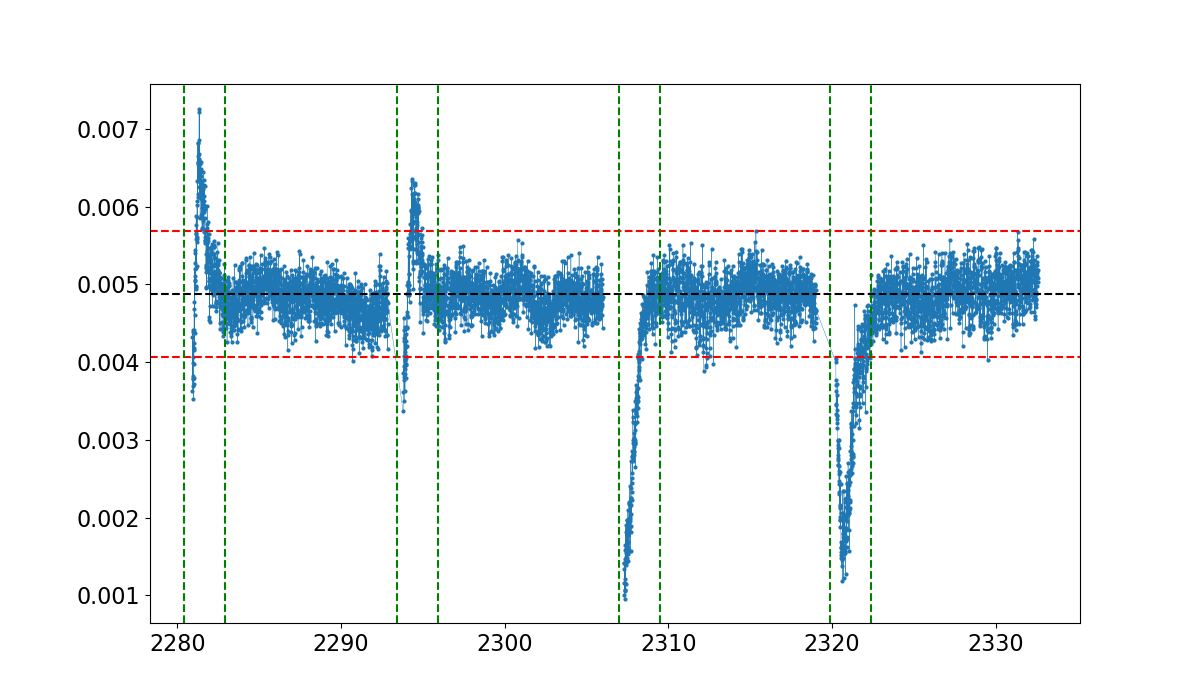

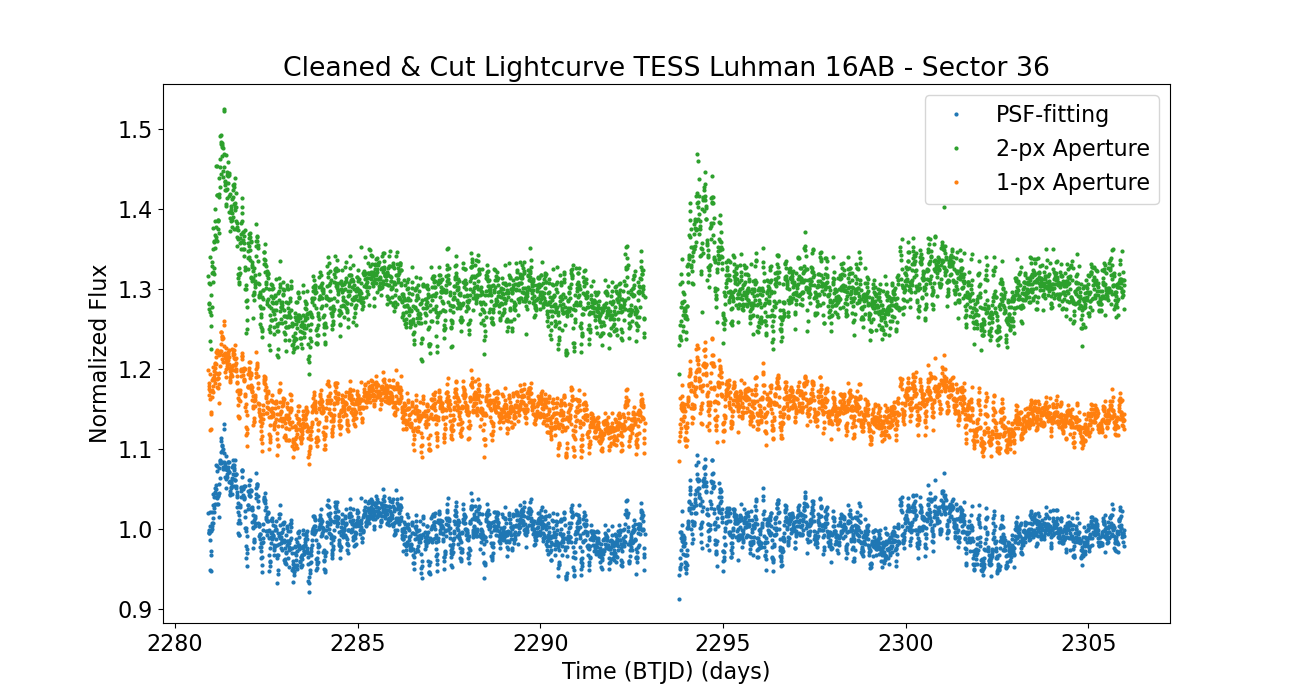

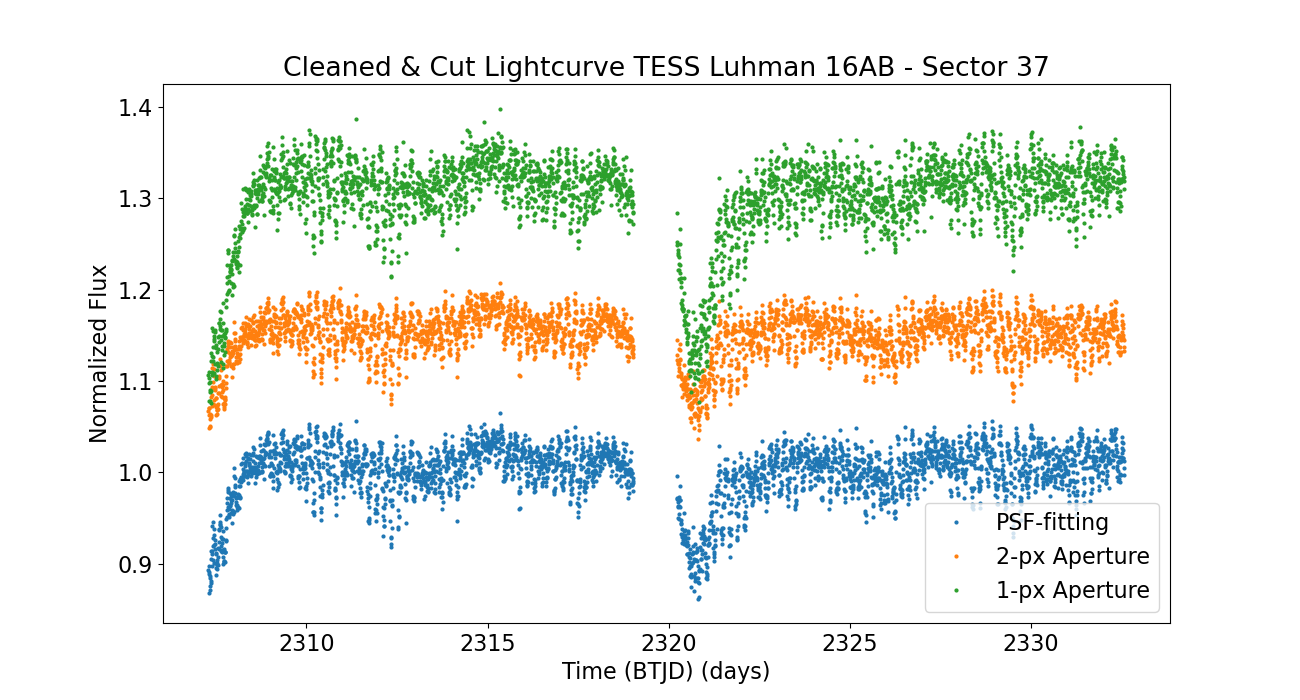

In [ ]:
## Clean out bad data points and artifact at sector starts
plt.figure(figsize=(12,7))
plt.plot(lc36_data.TIME, lc36_data.AP3_FLUX_COR/lc36_data.AP2_FLUX_COR.mean()/lc36_data.AP3_FLUX_COR.mean(), 
         marker='o', ms=2, linewidth=0.3, c = 'tab:blue', label="AP3/AP2 Normalized Flux")
plt.plot(lc37_data.TIME, lc37_data.AP3_FLUX_COR/lc37_data.AP2_FLUX_COR.mean()/lc37_data.AP3_FLUX_COR.mean(), 
         marker='o', ms=2, linewidth=0.3, c = 'tab:blue')

## Plot mean line
plt.axhline(y=0.00488, ls='--', color='k')

## Plot horizontal cuts
h1, h2 = 0.00569, 0.00406
plt.axhline(y=h1, ls='--', color='r')
plt.axhline(y=h2, ls='--', color='r')

## Plot vertical cuts 
#1
x1, x2 = 2280.40, 2282.90
plt.axvline(x=x1, ls='--', color='g')
plt.axvline(x=x2, ls='--', color='g')
#2
x3, x4 = 2293.45, 2295.95
plt.axvline(x=x3, ls='--', color='g')
plt.axvline(x=x4, ls='--', color='g')
#3
x5, x6 = 2307.0, 2309.50
plt.axvline(x=x5, ls='--', color='g')
plt.axvline(x=x6, ls='--', color='g')
#4
x7, x8 = 2319.90, 2322.40
plt.axvline(x=x7, ls='--', color='g')
plt.axvline(x=x8, ls='--', color='g')

queryCutlc36 = '(TIME >= %f & TIME < %f) | (TIME >= %f & TIME < %f)'%(x2,x3,x4,x5)
queryCutlc37 = '(TIME >= %f & TIME < %f) | (TIME >= %f)'%(x6,x7,x8)
# lc36_data_clean = lc36_data.query(queryCutlc36)
# lc37_data_clean = lc37_data.query(queryCutlc37)

lc36_data_clean = lc36_data
lc37_data_clean = lc37_data

## PLOT CUT LIGHTCURVE - SECTOR 36
plt.figure(figsize=(13, 7)), plt.title('Cleaned & Cut Lightcurve TESS Luhman 16AB - Sector 36')
plt.plot(lc36_data_clean.TIME, lc36_data_clean.PSF_FLUX_COR/lc36_data_clean.PSF_FLUX_COR.mean(), 
         marker='o', ls='', ms=2, linewidth=0.3, c = 'tab:blue', label="PSF-fitting")
plt.plot(lc36_data_clean.TIME, lc36_data_clean.AP2_FLUX_COR/lc36_data_clean.AP2_FLUX_COR.mean()+0.3, 
         marker='o', ls='', ms=2, linewidth=0.3, c ='tab:green', label="2-px Aperture")
plt.plot(lc36_data_clean.TIME, lc36_data_clean.AP1_FLUX_COR/lc36_data_clean.AP1_FLUX_COR.mean()+0.15, 
         marker='o', ls='', ms=2, linewidth=0.3, c ='tab:orange', label="1-px Aperture")
plt.xlabel('Time (BTJD) (days)'), plt.ylabel('Normalized Flux'), plt.legend()

## PLOT CUT LIGHTCURVE - SECTOR 37
plt.figure(figsize=(13, 7)), plt.title('Cleaned & Cut Lightcurve TESS Luhman 16AB - Sector 37')
plt.plot(lc37_data_clean.TIME, lc37_data_clean.PSF_FLUX_COR/lc37_data_clean.PSF_FLUX_COR.mean(), 
         marker='o', ls='', ms=2, linewidth=0.3, c = 'tab:blue', label="PSF-fitting")
plt.plot(lc37_data_clean.TIME, lc37_data_clean.AP1_FLUX_COR/lc37_data_clean.AP1_FLUX_COR.mean()+0.15, 
         marker='o', ls='', ms=2, linewidth=0.3, c = 'tab:orange', label="2-px Aperture")
plt.plot(lc37_data_clean.TIME, lc37_data_clean.AP2_FLUX_COR/lc37_data_clean.AP2_FLUX_COR.mean()+0.3, 
         marker='o', ls='', ms=2, linewidth=0.3, c = 'tab:green', label="1-px Aperture")
plt.xlabel('Time (BTJD) (days)'), plt.ylabel('Normalized Flux'), plt.legend()

In [161]:
# Data write out
import warnings
warnings.filterwarnings('ignore')

outpath = "~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/"
lc_out_path = "luhman_16ab_sector36-37.txt"

lc36_flux_mean = lc36_data_clean.PSF_FLUX_COR.mean()
lc36_data_clean['PSF_FLUX_NORM'] = lc36_data_clean.PSF_FLUX_COR / lc36_flux_mean
lc36_data_clean['PSF_EFLUX'] = 0.047*lc36_data_clean['PSF_FLUX_NORM']

lc37_flux_mean = lc37_data_clean.PSF_FLUX_COR.mean()
lc37_data_clean['PSF_FLUX_NORM'] = lc37_data_clean.PSF_FLUX_COR / lc37_flux_mean
lc37_data_clean['PSF_EFLUX'] = 0.047*lc37_data_clean['PSF_FLUX_NORM']

frames = [lc36_data_clean[['TIME', 'PSF_FLUX_NORM','PSF_EFLUX', 'X_POSITION', 'Y_POSITION', 'DQUALITY']],
          lc37_data_clean[['TIME', 'PSF_FLUX_NORM','PSF_EFLUX', 'X_POSITION', 'Y_POSITION', 'DQUALITY']]]

lc3637 = pd.concat(frames)
lc3637.to_csv(outpath+lc_out_path, sep='\t', index=False)

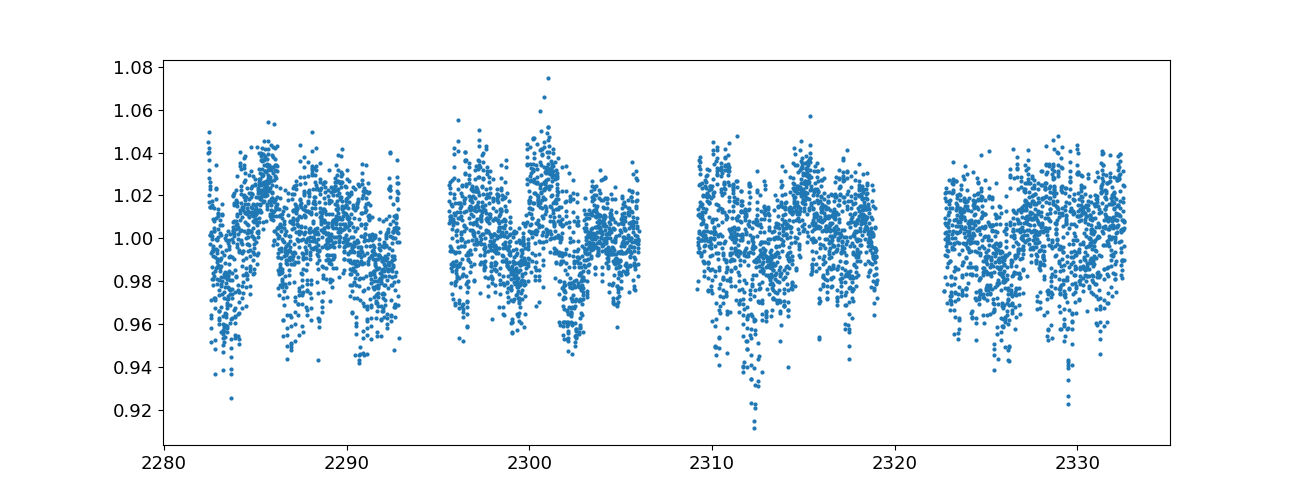

In [162]:
lc3637
plt.figure(figsize=(13,5))
plt.plot(lc3637.TIME, lc3637.PSF_FLUX_NORM, marker='o', ls='', ms=2)

In [70]:
lc36_data

,TIME,TIMECORR,PSF_FLUX_RAW,PSF_FLUX_COR,AP1_FLUX_RAW,AP1_FLUX_COR,AP2_FLUX_RAW,AP2_FLUX_COR,AP3_FLUX_RAW,AP3_FLUX_COR,AP4_FLUX_RAW,AP4_FLUX_COR,SKY_LOCAL,X_POSITION,Y_POSITION,DQUALITY,PSF_MEAN,PSF_FLUX_NORM,PSF_EFLUX_NORM,PSF_EFLUX2
0,2280.909100,0.0,320.758581,316.418938,148.109190,149.937687,210.985359,208.217799,170.231977,145.450965,88.625713,88.862543,806.630249,540.1696,156.2571,0,309.866557,1.021146,0.021146,0.013529
1,2280.916045,0.0,312.888606,308.320076,145.642624,147.092658,204.123873,201.286882,146.968776,121.968643,45.321190,45.537382,808.620544,540.1701,156.2574,0,309.866557,0.995009,-0.004991,0.014601
2,2280.922989,0.0,313.791212,309.690569,146.301402,147.543244,202.641575,199.891320,153.132902,127.124590,67.447336,67.652929,809.265381,540.1697,156.2576,0,309.866557,0.999432,-0.000568,0.013068
3,2280.929934,0.0,313.204958,308.954755,143.976252,145.478830,209.104063,206.325497,175.175067,148.681126,106.102438,106.301297,810.782166,540.1709,156.2573,0,309.866557,0.997057,-0.002943,0.013570
4,2280.936878,0.0,313.060285,308.545008,145.290993,146.599512,203.714861,200.951592,161.091293,134.388625,79.849540,80.050316,813.046875,540.1713,156.2554,0,309.866557,0.995735,-0.004265,0.014423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2305.958000,0.0,307.882775,307.893242,141.251273,141.265296,206.661760,207.179641,170.023741,170.468940,92.666419,92.782281,136.289917,540.1146,156.2341,0,309.866557,0.993632,-0.006368,0.000034
3473,2305.964944,0.0,308.773653,308.590074,141.311335,140.849247,208.592984,209.139405,168.534628,168.530929,88.574232,88.706079,136.203613,540.1145,156.2351,0,309.866557,0.995881,-0.004119,0.000595
3474,2305.971889,0.0,307.580308,307.256017,141.166559,140.918522,205.453176,205.925530,163.527433,163.033889,86.669788,86.748330,135.811218,540.1150,156.2345,0,309.866557,0.991575,-0.008425,0.001054
3475,2305.978833,0.0,303.834591,303.330276,139.955752,139.404320,199.534294,199.913878,149.522666,149.353602,64.582104,64.653044,136.404587,540.1151,156.2355,0,309.866557,0.978906,-0.021094,0.001660


168.54747261022464

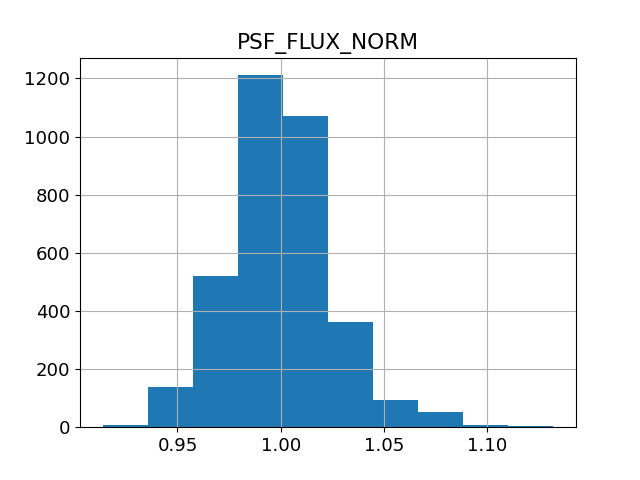

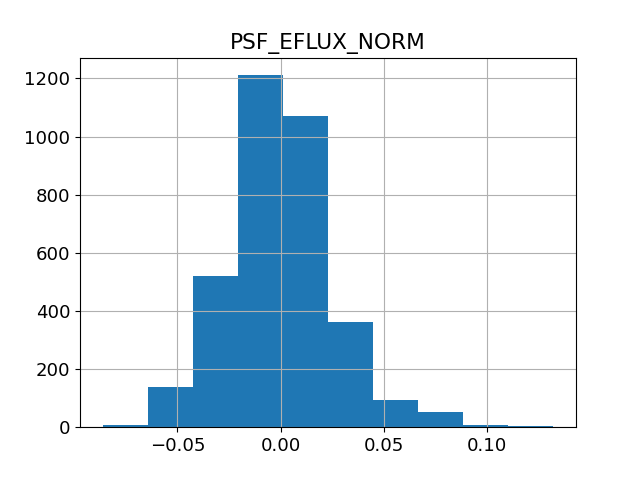

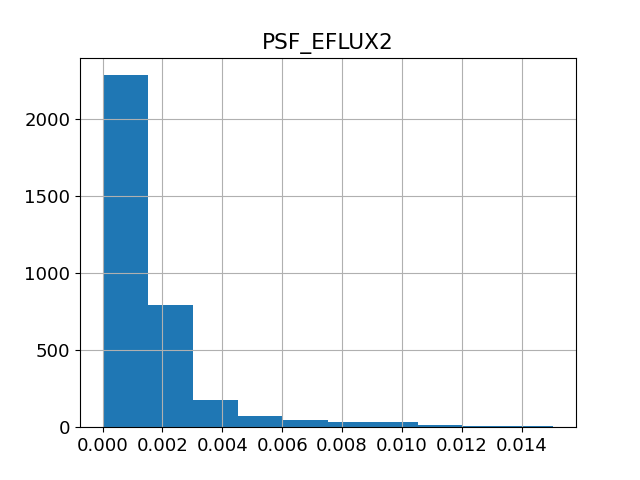

In [71]:
lc36_data.hist(column='PSF_FLUX_NORM')
lc36_data.hist(column='PSF_EFLUX_NORM')
lc36_data.hist(column='PSF_EFLUX2')
lc36_data.PSF_FLUX_COR.mean()
lc36_data.SKY_LOCAL.mean()

In [153]:
(lc3637.TIME.max()-lc3637.TIME.min())* 24

1192.1661810000041